In [22]:
import pandas as pd

Understanding the dataset

In [23]:
dataFrame=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

num_rows=dataFrame.shape[0]
num_cols=dataFrame.shape[1]


In [24]:
num_rows

1470

In [25]:
num_cols

35

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [27]:
dataFrame.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [28]:
dataFrame.duplicated().sum()

0

Data cleaning

In [29]:
numeric_columns=dataFrame.select_dtypes(include=['float64', 'int64']).columns.to_list()
dataFrame[numeric_columns] = dataFrame[numeric_columns].fillna(dataFrame[numeric_columns].mean())
#numeric_columns


In [30]:
dataFrame.drop_duplicates(inplace=True)

In [31]:
dataFrame.dropna(subset=['Attrition'],inplace=True)

Creation of input and output features

In [32]:
features=dataFrame.drop(columns=['Attrition'])
labels=dataFrame['Attrition']



Conversion of features into numeric values

In [33]:
non_numeric_columns=features.select_dtypes(include=['object']).columns
#non_numeric_columns


In [34]:
dataFrame_encoded=pd.get_dummies(features,columns=non_numeric_columns)
dataFrame_encoded


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,False,False,False,False,False,True,False,True,True,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,True,False,True,True,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,False,False,False,True,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,True,False,False,True,False,True,True,False


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
labels= label_encoder.fit_transform(labels)
labels

array([1, 0, 1, ..., 0, 0, 0])

Scaling of the features

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def scaling(method,numeric_columns):
    if(method=='minmax'):
        minmaxscaler=MinMaxScaler()
        scaled=minmaxscaler.fit_transform(numeric_columns)
    elif(method=='scaler'):
        standeredscaler=StandardScaler()
        scaled=standeredscaler.fit_transform(numeric_columns)
    return scaled


In [37]:
numeric_columns = dataFrame.select_dtypes(include=['float64', 'int64'])
scaled=scaling('minmax',numeric_columns)
scaled

array([[0.54761905, 0.71581961, 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.12670007, 0.25      , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.37652112, 0.25      , ..., 0.16666667, 0.06666667,
        0.11764706]])

Correlation Analysis


In [38]:
scaled_df = pd.DataFrame(scaled, columns=numeric_columns.columns, index=dataFrame.index)
dataFrame_encoded = dataFrame_encoded.drop(columns=scaled_df.columns.intersection(dataFrame_encoded.columns))
final_dataFrame = pd.concat([scaled_df, dataFrame_encoded], axis=1)

features_df = pd.DataFrame(final_dataFrame, columns=final_dataFrame.columns) 
target_df = pd.DataFrame(labels, columns=['Attrition'])

In [39]:
target_series = target_df['Attrition']
correlations = features_df.corrwith(target_series)
correlations

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

In [40]:
toptwenty=correlations.abs().sort_values(ascending=False).head(20).index
toptwenty

Index(['OverTime_Yes', 'OverTime_No', 'MaritalStatus_Single',
       'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
       'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager',
       'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement',
       'BusinessTravel_Travel_Frequently', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'JobRole_Laboratory Technician',
       'MaritalStatus_Married', 'JobRole_Research Director',
       'MaritalStatus_Divorced'],
      dtype='object')

OverTime_Yes


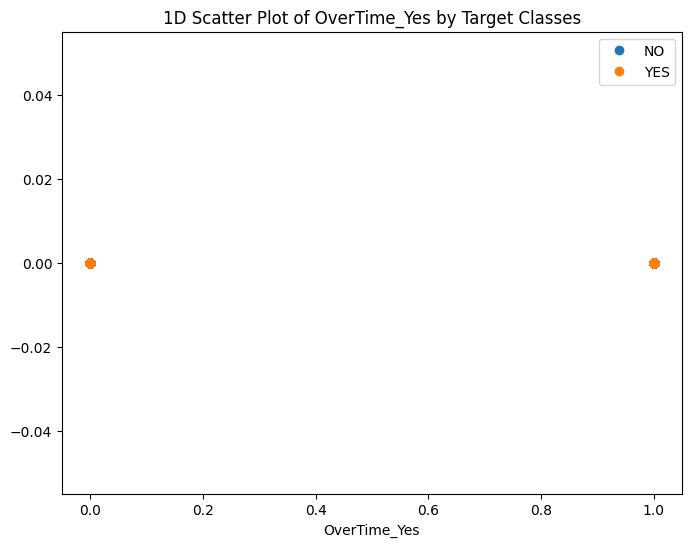

OverTime_No


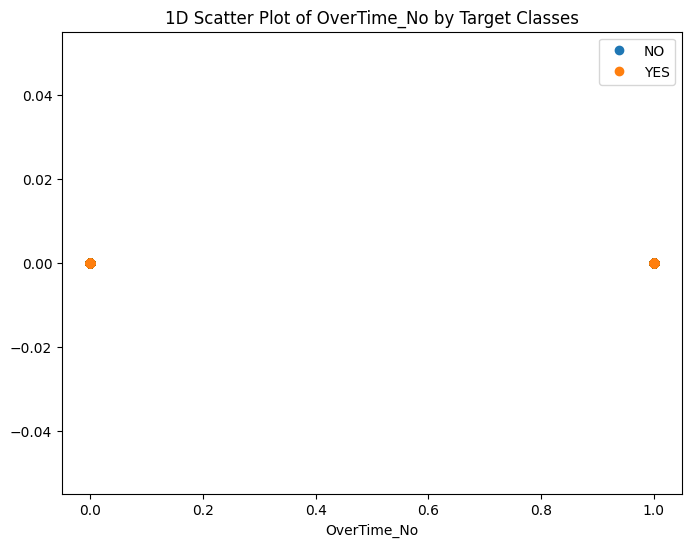

MaritalStatus_Single


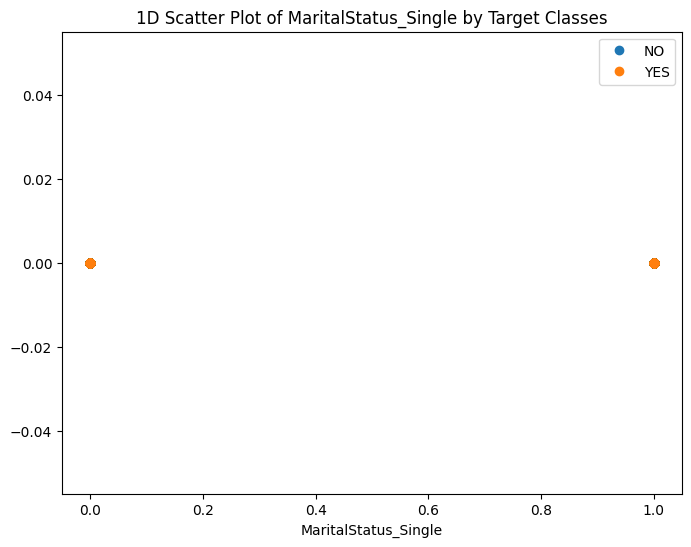

TotalWorkingYears


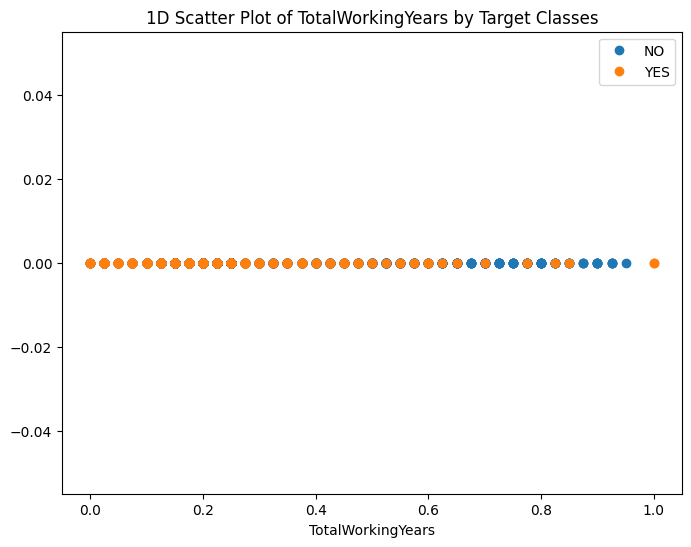

JobLevel


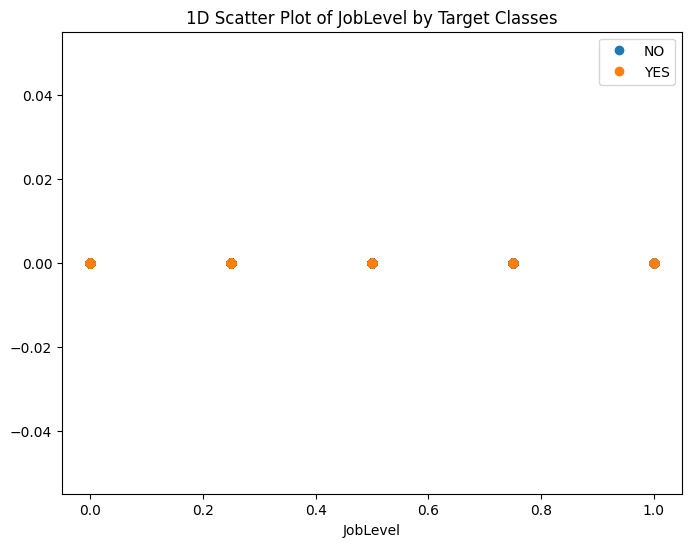

YearsInCurrentRole


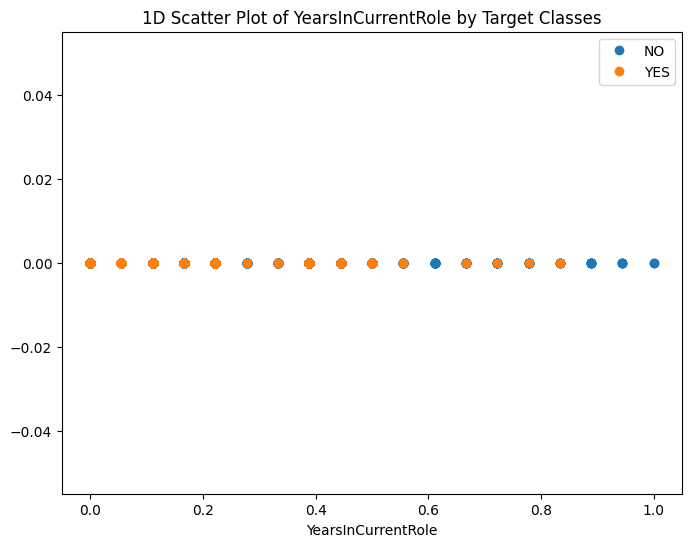

MonthlyIncome


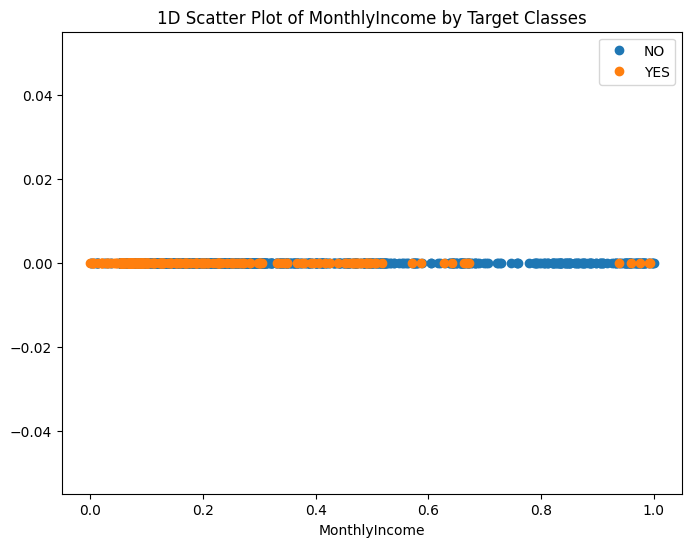

Age


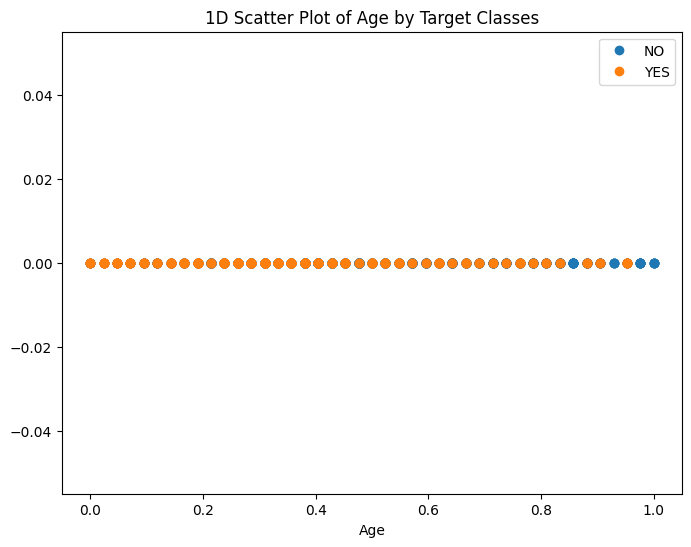

JobRole_Sales Representative


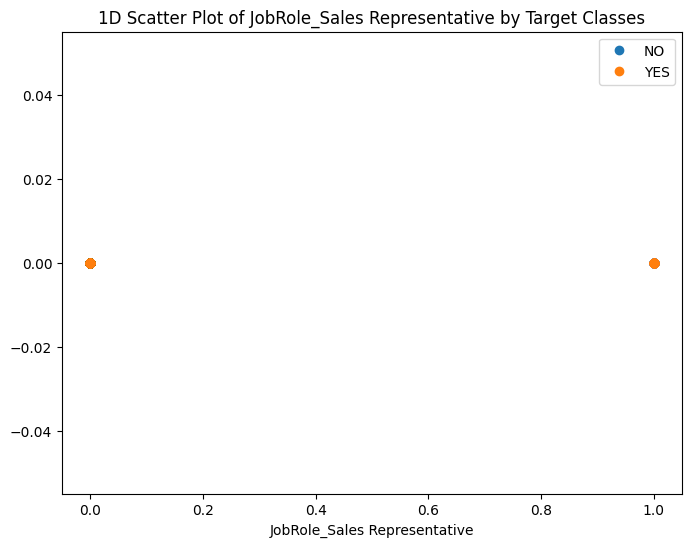

YearsWithCurrManager


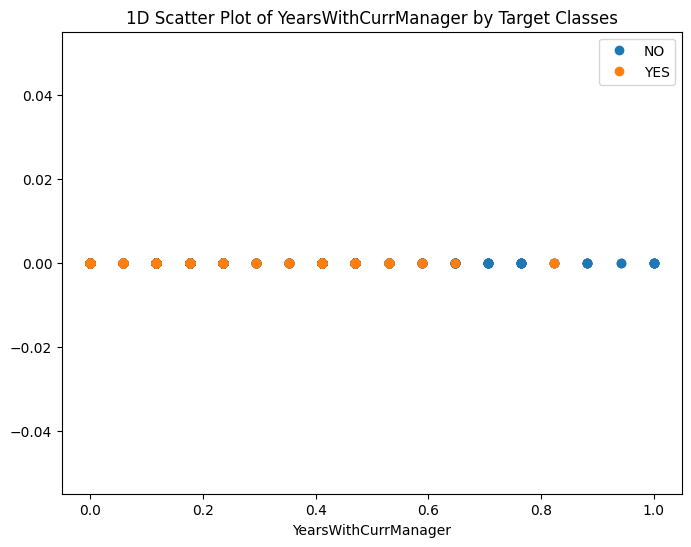

StockOptionLevel


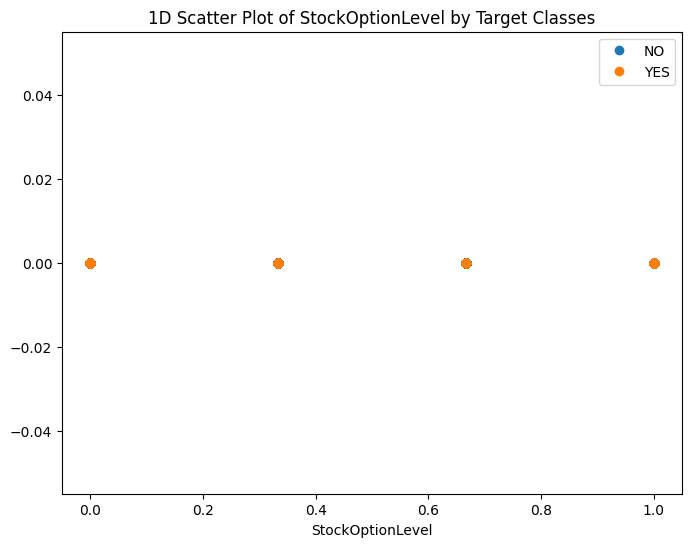

YearsAtCompany


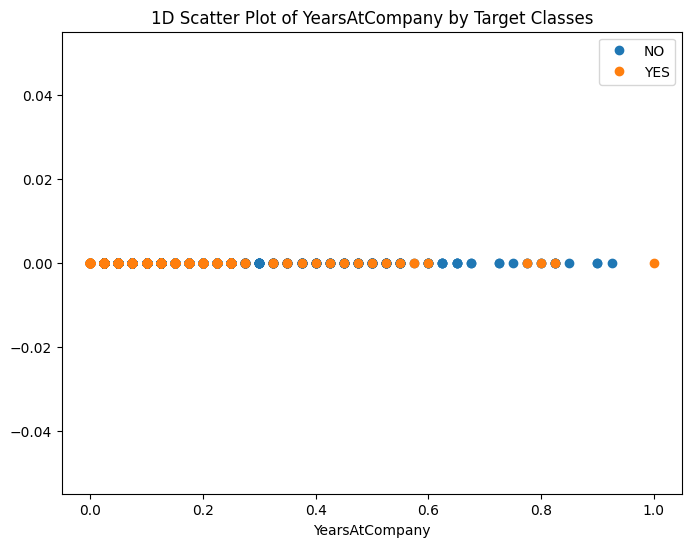

JobInvolvement


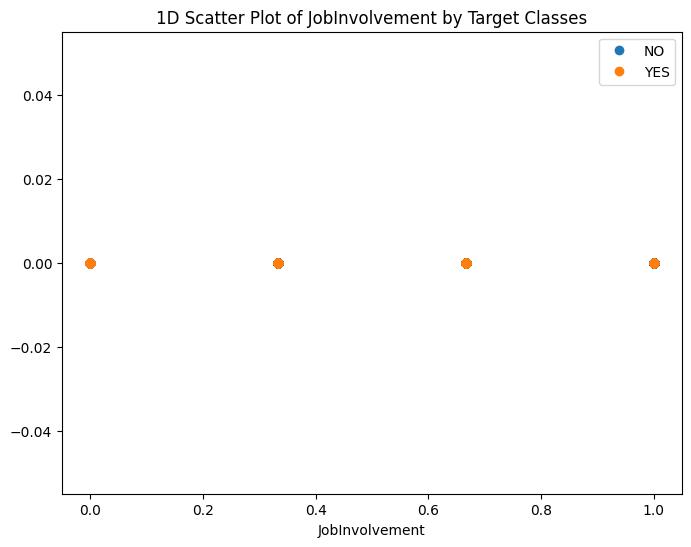

BusinessTravel_Travel_Frequently


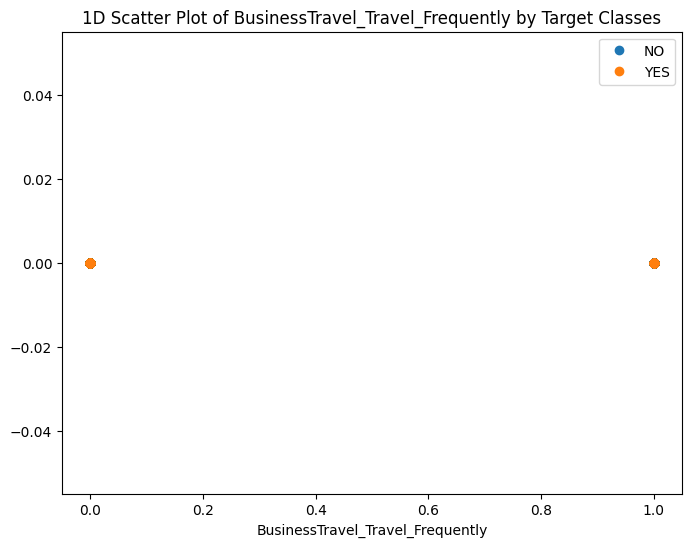

JobSatisfaction


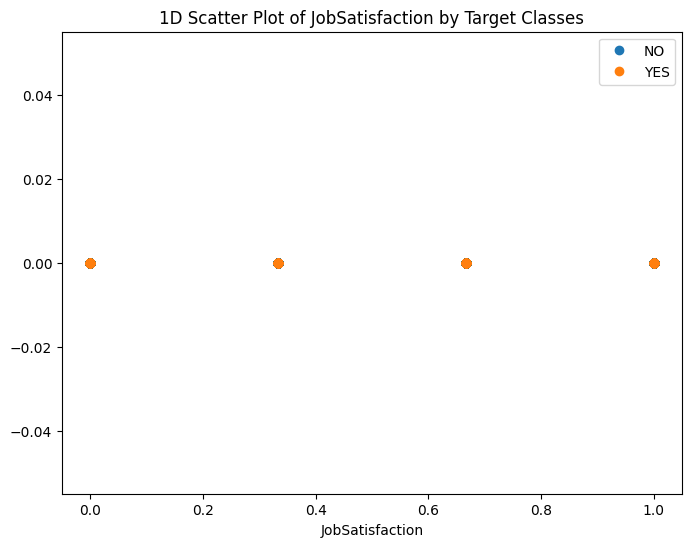

EnvironmentSatisfaction


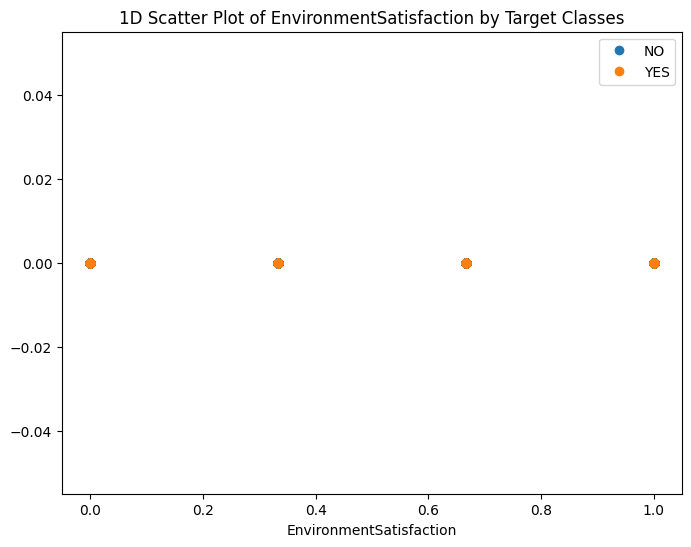

JobRole_Laboratory Technician


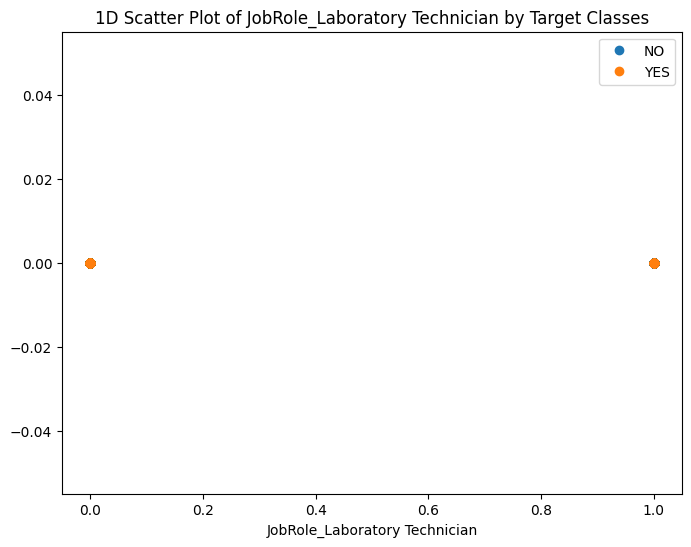

MaritalStatus_Married


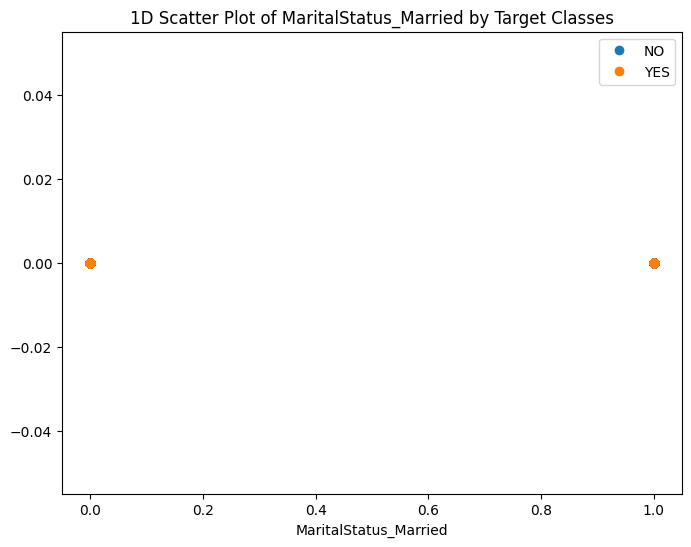

JobRole_Research Director


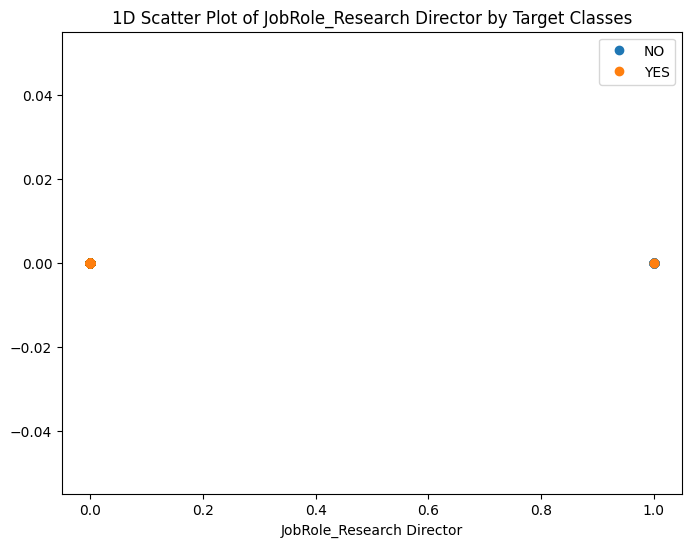

MaritalStatus_Divorced


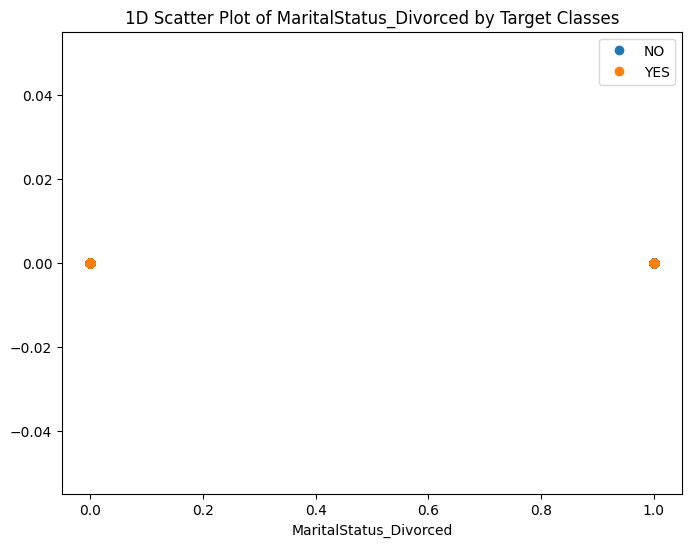

In [41]:
import matplotlib.pyplot as plt
import numpy as np

toptwenty_df = features_df[toptwenty]


# Iterate over the top 20 features
class_0 = toptwenty_df.loc[target_df["Attrition"] == 0]
class_1 = toptwenty_df.loc[target_df["Attrition"] == 1]



for feature in toptwenty:
    # Separate the data based on the target classes (e.g., Attrition)
    print(feature)
    
    # Create a 1D scatter plot
    plt.figure(figsize=(8, 6))
    plt.plot(class_0[feature], np.zeros_like(class_0[feature]), 'o', label='NO')
    plt.plot(class_1[feature], np.zeros_like(class_1[feature]), 'o', label='YES')
    
    plt.legend()
    plt.xlabel(feature)
    plt.title(f'1D Scatter Plot of {feature} by Target Classes')
    plt.show()


In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(toptwenty_df,target_df, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")


Accuracy of Logistic Regression classifier: 0.87


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
